# 武汉病毒传播分析

## MODEL1

#### 假设

- S Susceptibles 易感者（非病毒携带者），可能被感染的健康者
- I Infected 感染者（病毒携带者），已经被感染，并且可以感染易感者
- 总人口为N，**总人口固定不变**，易感者（健康者）为S，感染者为I<br>
    \\[
    S+I = N
    \\]
- 平均每人每天接触r人，发生接触传染的概率为β
- 时间变量为t

#### 可变性假设

- 一旦传染，不具备自愈能力
- 一旦传染，将终身具有传染性
- 所有人，不进行医疗措施

#### 推断

1. 因为平均每人每天接触r人，其中健康者人数为：<BR>
\\[
r \times \frac{S}{N}
\\]
- 每天新增感染者数量为：<BR>
\\[
\frac{I \times r \times \beta \times S}{N}
\\]
- 则新增感染者为则为感染者增加的速度：<BR>
\\[
\frac{dI}{dt} = \frac{I \times r \times \beta \times S}{N}
\\]
- 同理，未感染者降低的速度为：<BR>
\\[
\frac{dS}{dt} = -\frac{I \times r \times \beta \times S}{N}
\\]
- 由3式，则可以分别求出I随时间变化的表达式。<br>
    1. 将
    \\[
    S = N-I
    \\]
    带入3式为:
    \\[
    \frac{dI}{dt} = \frac{I \times r \times \beta \times {(N-I)}}{N}
    =r\beta I - \frac{r \beta I^2}{N}
    \\]
    1. 整理得：
    \\[
    \frac{dI}{dt} =r\beta I + (- \frac{r \beta }{N}) I^2
    \\]
    满足伯努利微分方程形式：
    \\[
    y'=P(x)y+Q(x)y^n
    \\]
    <BR>其中<BR>
    \\[
    P(x) = r\beta
    \\],
    \\[
    Q(x) = - \frac{r \beta }{N}
    \\],
    \\[
    n=2
    \\]
    
    1. 两边同乘以\\[I^{-2}\\]，有：
    \\[
    I^{-2}\frac{dI}{dt} =r\beta I^{-1} + (- \frac{r \beta }{N})
    \\]
    1. 令\\[z = I^{-1}\\]，得，
    \\[
    \frac{dz}{dt} = -I^{-2}\frac{dI}{dt}
    \\]，带入得：<br>
    
    \\[
    \frac{dz}{dt} -r\beta z = - \frac{r \beta }{N}
    \\]为一阶非齐次线性方程，带入通解公式：得：
    \\[
    z = \frac{1-e^{-r\beta t}}{N} + z_0
    \\]
    1. 令I0+S0=n，带入原式，得：
    \\[
    I(t)=\frac{NI_0}{I_0+S_0e^{-r\beta t}}
    \\]
- 可得健康人为：
\\[
S(t) = N - I(t)
\\]

* 假设一个区域有10000人
* 如果在某个时刻，有1人被感染，每人每天接触10人，β=0.01，则可画出感染图像为：

In [4]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
i0 = 1
N = 10000
r = 10
beta = 0.01

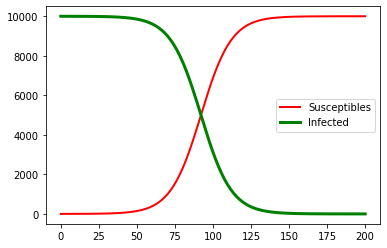

In [6]:
def I(t):
    s0 = N - i0
    return N*i0 / (i0 + s0*np.exp(-r*beta*t))

def S(t):
    return N-I(t)

x_data = np.linspace(0,200,200,endpoint=True)
i_data = I(x_data)
s_data = S(x_data)

plt.plot(x_data,i_data,color='red',linewidth=2.0,linestyle='-')
plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')

plt.legend(labels=['Susceptibles','Infected'])
plt.show()

### 如果不加管控，则所有人都会被感染！


## MODEL2

上述模型比较简单，在实际情况中，病在一定程度上会自愈，例如感冒。另外病毒携带者并非终身具有传染性，通常是在病发是传染，潜伏期不具备传染性

当年的SARS，则是病发状态（如高烧时）具有传染性。
因此，调整可变性假设为：

#### 可变性假设

- <del> 一旦传染，不具备自愈能力 </del>
- *被传染者，有γ概率自愈（非病发状态）
- <del> 一旦传染，将终身具有传染性 </del>
- *病发状态下具有传染性，非病发不具备传染性
- 所有人，不进行医疗措施

#### 推导

1.- 则新增感染者为则为感染者增加的速度：<BR>
\\[
\frac{dI}{dt} = \frac{I \times r \times \beta \times S}{N} - \gamma \times I
\\]
1. 推导过程略。基本同上。
1. 可得：<BR>
\\[
I(t)=\frac{NI_0\frac{r\beta - \gamma}{r\beta }}{I_0+(N\frac{r\beta - \gamma}{r\beta } - I_0)e^{-(r\beta -\gamma)t}}
\\]

画出曲线：

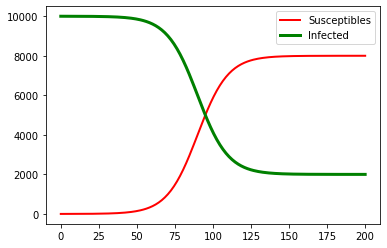

In [7]:
gamma = 0.02

def I2(t):
    return (N*i0*(r*beta-gamma)/r/beta) / (i0 + (N*(r*beta-gamma)/r/beta-i0)*np.exp(-r*beta*t))

def S2(t):
    return N-I2(t)

x_data = np.linspace(0,200,200,endpoint=True)
i_data = I2(x_data)
s_data = S2(x_data)

plt.plot(x_data,i_data,color='red',linewidth=2.0,linestyle='-')
plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')

plt.legend(labels=['Susceptibles','Infected'])
plt.show()

### 有自愈能力时，最终的病患与健康者会趋向平衡，平衡与beta, gamma有关。
### 这里有2个有意思的结论：

1. 当gamma是beta的10倍时，病毒将不具备传染性！
1. 当gamma是beta的5倍时，感染收敛时会各占人数的一半。
1. 10倍之间，会平衡到某个点


In [8]:
def plot_beta_gamma(b, g, plot_loc):
    global beta, gamma
    beta = b
    gamma = g
    x_data = np.linspace(0,200,200,endpoint=True)
    i_data = I2(x_data)
    s_data = S2(x_data)
    axes = plt.subplot(plot_loc)
    plt.plot(x_data,i_data,color='red',linewidth=2.0,linestyle='-')
    plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')
    
    plt.legend(labels=['Susceptibles','Infected'])
    plt.title('beta=%.2f, gamma=%.2f' % (b,g),color='blue',fontweight=800)

/Users/jpbirdy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


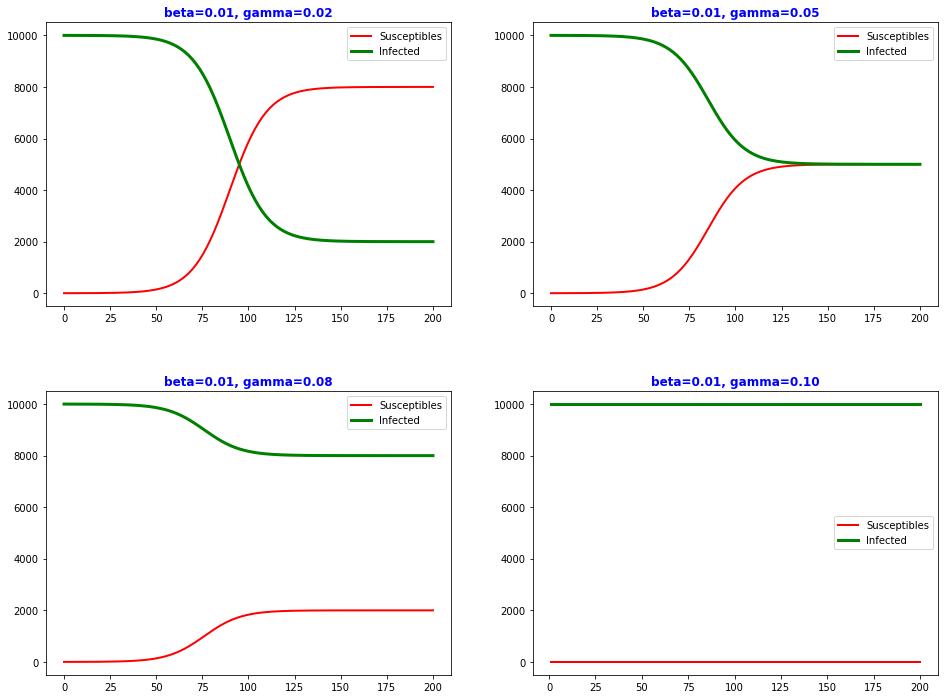

In [9]:
plt.figure(figsize=(16, 12))
plot_beta_gamma(0.01, 0.02, 221)
plot_beta_gamma(0.01, 0.05, 222)
plot_beta_gamma(0.01, 0.08, 223)
plot_beta_gamma(0.01, 0.10, 224)
plt.subplots_adjust(hspace=0.3)
plt.show()


## MODEL3

大部分病毒性感染，得病自愈后，会产生抗体，即会有极强的自愈能力。
此时人群中对多出一类人群R，Recovered，康复者

#### 可变性假设

- <del> 一旦传染，不具备自愈能力 </del>
- 被传染者，有γ概率自愈（非病发状态），自愈后将产生抗体，不再发病
- <del> 一旦传染，将终身具有传染性 </del>
- 病发状态下具有传染性，非病发不具备传染性
- 所有人，不进行医疗措施

#### 推导

- 
\\[
\frac{dS}{dt} = \frac{I \times r \times \beta \times S}{N}
\\]
- 
\\[
\frac{dI}{dt} = \frac{I \times r \times \beta \times S}{N} - \gamma \times I
\\]
- 
\\[
\frac{dR}{dt} = \gamma \times I
\\]

#### ***该方程无法得到解析解***，但是可以得到每天的人数

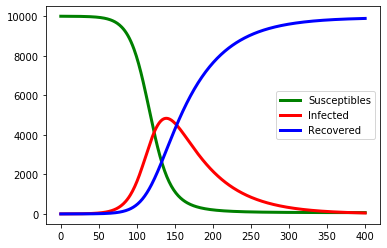

In [10]:
beta = 0.01
gamma = 0.02

tsize = 400
s_data = [float(N-i0)]
i_data = [float(i0)]
r_data = [float(0)]

for i in range(1, tsize):
    si = s_data[i-1]
    ii = i_data[i-1]
    ri = r_data[i-1]
    # 没人接触r人，其中s的概率为si / N
    new_i = r * ii * si / N * beta
    new_r = ii * gamma
    s_data.append(si - new_i)
    i_data.append(ii + new_i-new_r)
    r_data.append(ri+new_r)

x_data = np.linspace(0,tsize,tsize,endpoint=True)
plt.figure()
plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')
plt.plot(x_data,i_data,color='red',linewidth=3.0,linestyle='-')
plt.plot(x_data,r_data,color='blue',linewidth=3.0,linestyle='-')
plt.legend(labels=['Susceptibles','Infected', 'Recovered'])
plt.show()

#### 有抗体存在，初期仍然会有爆发，但最终所有人都将康复

## MODEL4

大部分病毒，不会在第一时间病发，而是会先进入潜伏期，而部分病毒，在潜伏期依然有传染性。
因此，在模型中再引入潜伏者Exposed。

#### 可变性假设

- <del> 一旦传染，不具备自愈能力 </del>
- 被传染者，有γ概率自愈（非病发状态），自愈后将产生抗体，不再发病
- <del> 一旦传染，将终身具有传染性 </del>
- <del> 病发状态下具有传染性，非病发不具备传染性 <del>
- 被传染后，会先进入潜伏期，潜伏期是否具备传染性，会进行测试
- 潜伏者会以概率a转化为感染者，则潜伏期为1/a（即潜伏期内所有人将被转化为感染者）
- 所有人，不进行医疗措施

#### 推导

- 
\\[
\frac{dS}{dt} = \frac{I \times r \times \beta \times S}{N}
\\]
- 
\\[
\frac{dE}{dt} = \frac{E \times r \times \beta \times S}{N} - aE
\\]
- 
\\[
\frac{dI}{dt} = aE - \gamma \times I
\\]
- 
\\[
\frac{dR}{dt} = \gamma \times I
\\]

#### ***该方程无法得到解析解***，但是可以得到每天的人数

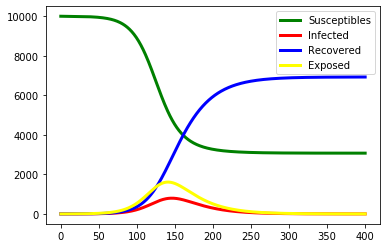

In [22]:
beta = 0.03
gamma = 0.1
# 假设潜伏期10天
a = 0.1
r = 20

tsize = 400
s_data = [float(N-i0)]
i_data = [float(i0)]
r_data = [float(0)]
e_data = [float(0)]

for i in range(1, tsize):
    si = s_data[i-1]
    ii = i_data[i-1]
    ri = r_data[i-1]
    ei = e_data[i-1]
    # 没人接触r人，其中s的概率为si / N
    new_e = r * (ii) * si / N * beta - a*ei
    new_i = a*ei-gamma*ii
    new_r = ii * gamma
    
    s_data.append(si - new_e)
    e_data.append(ei+new_e-new_i)
    i_data.append(ii + new_i-new_r)
    r_data.append(ri+new_r)
    

x_data = np.linspace(0,tsize,tsize,endpoint=True)
plt.figure()
plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')
plt.plot(x_data,i_data,color='red',linewidth=3.0,linestyle='-')
plt.plot(x_data,r_data,color='blue',linewidth=3.0,linestyle='-')
plt.plot(x_data,e_data,color='yellow',linewidth=3.0,linestyle='-')
plt.legend(labels=['Susceptibles','Infected', 'Recovered', 'Exposed'])
plt.show()

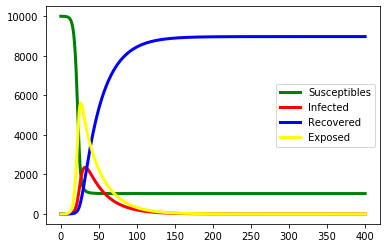

In [23]:
# 如果在潜伏期也有传染性！！！！！
tsize = 400
s_data = [float(N-i0)]
i_data = [float(i0)]
r_data = [float(0)]
e_data = [float(0)]

for i in range(1, tsize):
    si = s_data[i-1]
    ii = i_data[i-1]
    ri = r_data[i-1]
    ei = e_data[i-1]
    # 没人接触r人，其中s的概率为si / N
    new_e = r * (ii + ei) * si / N * beta - a*ei
    new_i = a*ei-gamma*ii
    new_r = ii * gamma
    
    s_data.append(si - new_e)
    e_data.append(ei+new_e-new_i)
    i_data.append(ii + new_i-new_r)
    r_data.append(ri+new_r)
    

x_data = np.linspace(0,tsize,tsize,endpoint=True)
plt.figure()
plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')
plt.plot(x_data,i_data,color='red',linewidth=3.0,linestyle='-')
plt.plot(x_data,r_data,color='blue',linewidth=3.0,linestyle='-')
plt.plot(x_data,e_data,color='yellow',linewidth=3.0,linestyle='-')
plt.legend(labels=['Susceptibles','Infected', 'Recovered', 'Exposed'])
plt.show()

#### 如果潜伏期具备感染性，则爆发的时间大幅度提前

#### 对比

如此我们基本把握了病毒传染的过程，这里做几组对比

In [45]:
def plot_r(rr, plot_loc, bb=0.,  tsize = 150):
    global r, beta
    beta = beta * (1 - bb)
    r = rr
    
    axes = plt.subplot(plot_loc)
    # 如果在潜伏期也有传染性！！！！！
   
    s_data = [float(N-i0)]
    i_data = [float(i0)]
    r_data = [float(0)]
    e_data = [float(0)]

    for i in range(1, tsize):
        si = s_data[i-1]
        ii = i_data[i-1]
        ri = r_data[i-1]
        ei = e_data[i-1]
        # 没人接触r人，其中s的概率为si / N
        new_e = r * (ii + ei) * si / N * beta - a*ei
        # 这里因为r过大，会导致new_e越界，做下控制
        if new_e < 0:
            new_e = 0
        if new_e > si:
            new_e = si
        new_i = a*ei-gamma*ii
        if new_i > ei:
            new_i = ei
        new_r = ii * gamma

        s_data.append(si - new_e)
        e_data.append(ei+new_e-new_i)
        i_data.append(ii + new_i-new_r)
        r_data.append(ri+new_r)
    
    x_data = np.linspace(0,tsize,tsize,endpoint=True)
    plt.plot(x_data,s_data,color='green',linewidth=3.0,linestyle='-')
    plt.plot(x_data,i_data,color='red',linewidth=3.0,linestyle='-')
    plt.plot(x_data,r_data,color='blue',linewidth=3.0,linestyle='-')
    plt.plot(x_data,e_data,color='yellow',linewidth=3.0,linestyle='-')
    plt.legend(labels=['Susceptibles','Infected', 'Recovered', 'Exposed'])
    plt.title('r=%d, b=%.2f' % (r, bb),color='blue',fontweight=800)

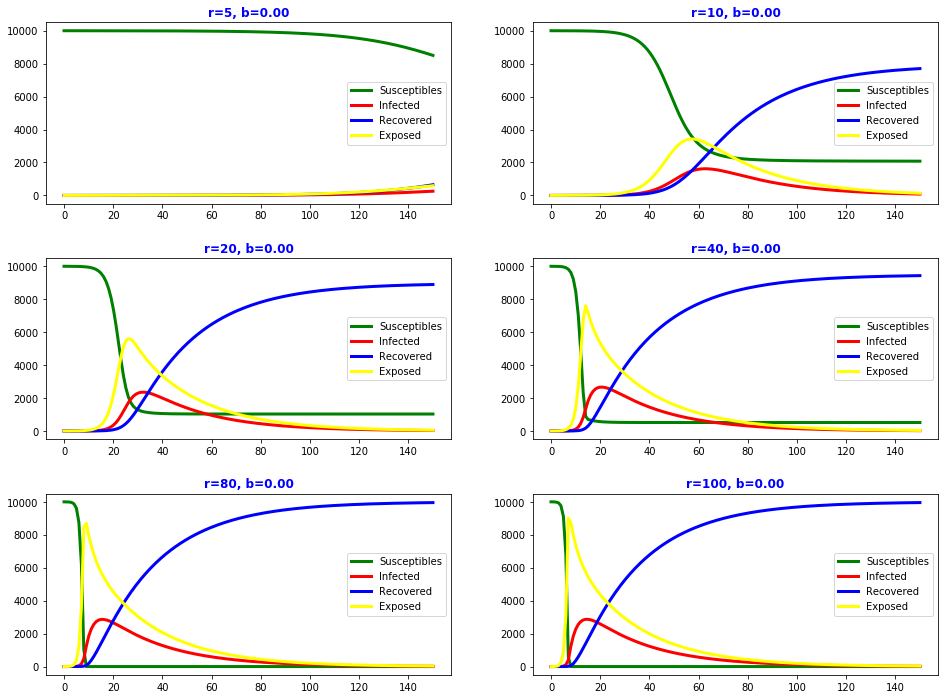

In [46]:
beta = 0.03
gamma = 0.1
# 假设潜伏期10天
a = 0.1
plt.figure(figsize=(16, 12))
plot_r(5, 321)
plot_r(10, 322)
plot_r(20, 323)
plot_r(40, 324)
plot_r(80, 325)
plot_r(100, 326)
plt.subplots_adjust(hspace=0.3)
plt.show()


## 所以

1. 如果只呆在家里，避免与人接触，每天能接触到的人仅5个以内，则几乎不会有病情传播。
1. 当接触人数到20人以上，传播速度极具提升。在10天左右则会爆发，人数越多越提前。
1. 如果高频逗留在公共场所，3天以内基本就会被传染并发病。

## 那么，是否带口罩呢？

可以假设，佩戴口罩，由于口罩作用，将有一定比例的病毒丧失传染能力。

这里对比不佩戴口罩（0防护），装饰品口罩（50%防护），医用口罩（80%防护），高级口罩（90%防护）


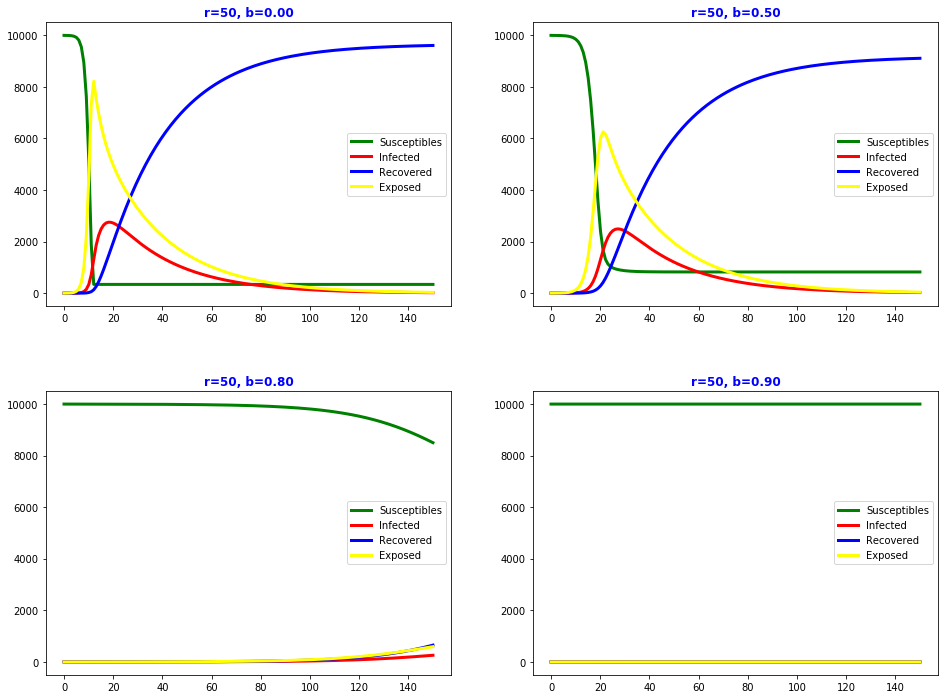

In [51]:
beta = 0.03
gamma = 0.1
# 假设潜伏期10天
a = 0.1
plt.figure(figsize=(16, 12))
plot_r(50, 221, .0)
plot_r(50, 222, .5)
plot_r(50, 223, .8)
plot_r(50, 224, .9)
plt.subplots_adjust(hspace=0.3)
plt.show()

## 所以

1. 带口罩会极大减少传播的概率，抑制传播速度。
1. 普通医用口罩，已经可以将病毒抑制到很低风险。
1. 高级口罩（90/95）等，有绝对抑制能力。
1. 如果能够及时就医，出现特效药，疫苗等等，对病毒的控制能力又将大大提高。
1. 。。。。。。


## 以上，仅供娱乐学习！！